##### Hello!! I found a lovely data set here -> https://datacatalog.urban.org/dataset/debt-america-2023
##### About Debt in america in 2023. Im going to start out with the Auto debt and see what I can learn. 
##### Thanks urban.org!!


###### simple centroid data set ---> https://www.kaggle.com/datasets/canonicalized/county-centroids

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

auto_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/dia_lbls_all_autoretail_county_2022_02_14Sep2023.csv')
#fips_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/us_zip_fips_county.csv')

## had to add this latin line because of a ver strange error
#fips_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/us_county_boundaries.csv', encoding='latin-1') 

#fips_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/us-county-boundaries.csv', on_bad_lines='skip') 
fips_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/County Centroids.csv') 

fips_data_frame.head()


,state,county,cfips,latitude,longitude
0,Alabama,Autauga County,1001,32.5081,-86.6513
1,Alabama,Baldwin County,1003,30.7725,-87.7842
2,Alabama,Barbour County,1005,31.8832,-85.3931
3,Alabama,Bibb County,1007,33.0388,-87.0967
4,Alabama,Blount County,1009,34.0126,-86.5339


In [2]:
fips_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3135 non-null   object 
 1   county     3135 non-null   object 
 2   cfips      3135 non-null   int64  
 3   latitude   3135 non-null   float64
 4   longitude  3135 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 122.6+ KB


In [3]:
auto_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 20 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   County FIPS                                                          3143 non-null   int64  
 1   County Name                                                          3143 non-null   object 
 2   State Name                                                           3143 non-null   object 
 3   Auto/retail loan delinquency rate, All                               2853 non-null   float64
 4   Auto/retail loan delinquency rate, Comm of color                     508 non-null    float64
 5   Auto/retail loan delinquency rate, White comm                        2519 non-null   float64
 6   Auto/retail loan delinquency rate by credit score - Subprime, All    1717 non-null   float64
 7   Auto/r

In [4]:
data_frame = pd.merge(left = auto_data_frame, right = fips_data_frame, left_on = 'County FIPS', right_on = 'cfips', how = 'inner')

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3135 entries, 0 to 3134
Data columns (total 25 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   County FIPS                                                          3135 non-null   int64  
 1   County Name                                                          3135 non-null   object 
 2   State Name                                                           3135 non-null   object 
 3   Auto/retail loan delinquency rate, All                               2848 non-null   float64
 4   Auto/retail loan delinquency rate, Comm of color                     507 non-null    float64
 5   Auto/retail loan delinquency rate, White comm                        2516 non-null   float64
 6   Auto/retail loan delinquency rate by credit score - Subprime, All    1717 non-null   float64
 7   Auto/r

In [40]:
income_by_state = data_frame.groupby('State Name').agg({'Average household income, All':'mean', 'Auto/retail loan delinquency rate, All':'mean'})

In [41]:
income_by_state.sort_values('Average household income, All', ascending = False).reset_index()

,State Name,"Average household income, All","Auto/retail loan delinquency rate, All"
0,District of Columbia,138855.700000,0.080059
1,New Jersey,121140.439524,0.027980
2,Massachusetts,117673.314286,0.020660
3,Connecticut,112776.322500,0.022114
4,Rhode Island,110150.276000,0.022273
5,Maryland,107468.354583,0.039464
6,California,103424.200690,0.027124
7,New Hampshire,100060.385000,0.019148
8,Hawaii,99803.740000,0.027389
9,Delaware,91412.160000,0.043428


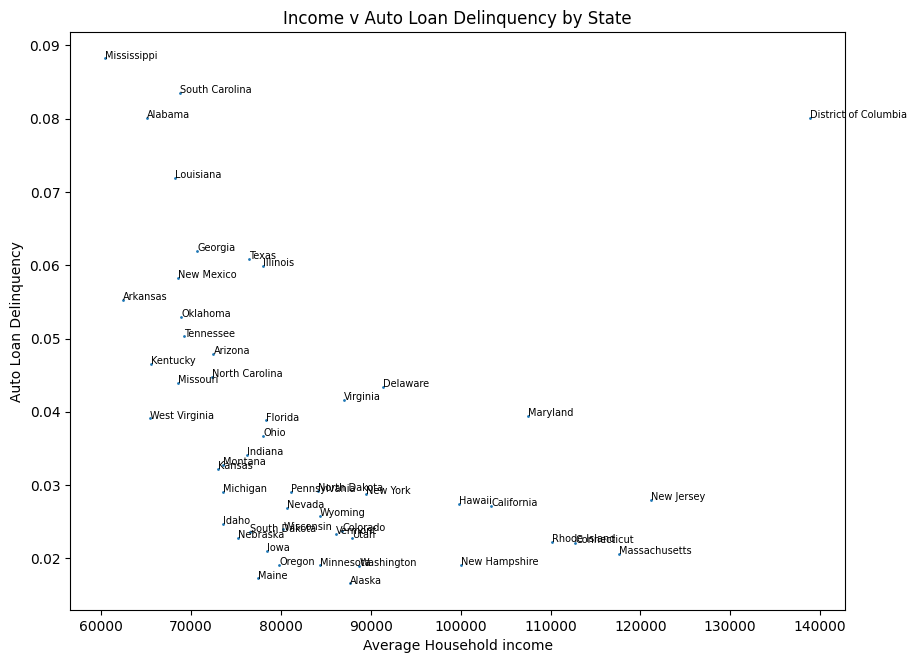

In [100]:
x = income_by_state['Average household income, All']
y = income_by_state['Auto/retail loan delinquency rate, All']

txt = income_by_state.index

plt.scatter(x, y, s = 1)



for j in range (income_by_state.shape[0]):
    plt.text(x[j], y[j], txt[j], fontsize = 7)

plt.rcParams["figure.figsize"] = (10,7.5)
plt.xlabel('Average Household income')
plt.ylabel('Auto Loan Delinquency')
plt.title('Income v Auto Loan Delinquency by State')
plt.show()

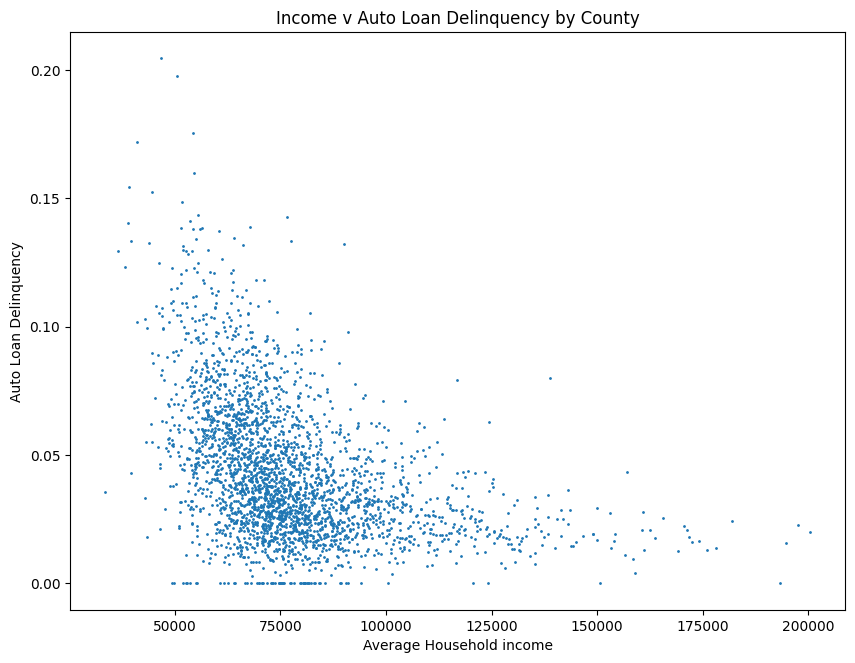

In [101]:
x = auto_data_frame['Average household income, All']
y = auto_data_frame['Auto/retail loan delinquency rate, All']

plt.scatter(x, y, s = 1)
plt.title('Income v Auto Loan Delinquency by County')
plt.xlabel('Average Household income')
plt.ylabel('Auto Loan Delinquency')
plt.show()

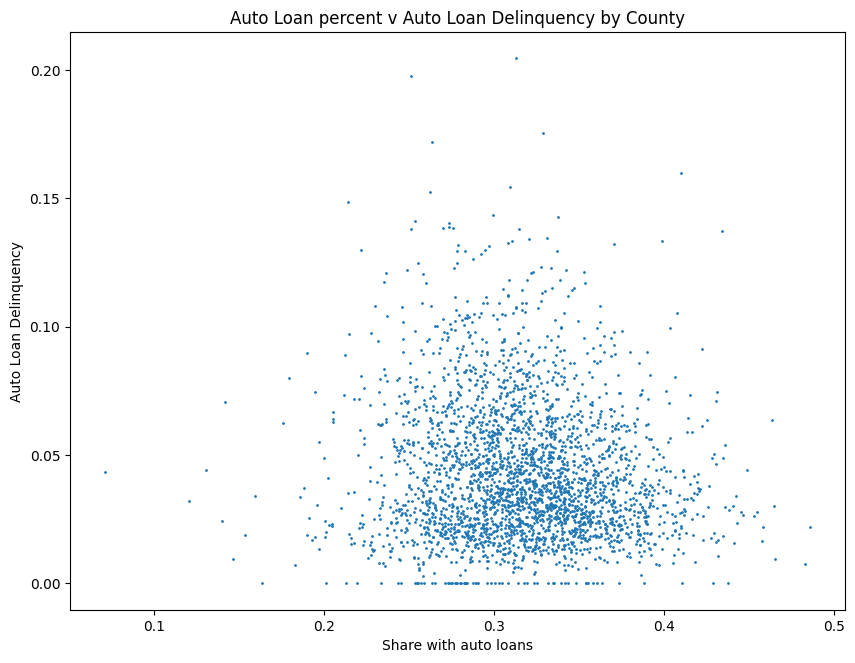

In [102]:
x = auto_data_frame['Share with auto loans, All']
y = auto_data_frame['Auto/retail loan delinquency rate, All']

plt.scatter(x, y, s = 1)
plt.title('Auto Loan percent v Auto Loan Delinquency by County')
plt.xlabel('Share with auto loans')
plt.ylabel('Auto Loan Delinquency')
plt.show()

In [8]:
data_frame.head()

,County FIPS,County Name,State Name,"Auto/retail loan delinquency rate, All","Auto/retail loan delinquency rate, Comm of color","Auto/retail loan delinquency rate, White comm","Auto/retail loan delinquency rate by credit score - Subprime, All","Auto/retail loan delinquency rate by credit score - Near prime, All","Auto/retail loan delinquency rate by credit score - Prime, All","Share with auto loans, All","Share with auto loans, Comm of color","Share with auto loans, White comm","Share with auto/retail loan debt, All","Share with auto/retail loan debt, Comm of color","Share with auto/retail loan debt, White comm","Share of people in rural areas, White comm",Share of people of color,"Average household income, All","Average household income, Comm of color","Average household income, White comm",state,county,cfips,latitude,longitude
0,1001,"Autauga County, Alabama",Alabama,0.063422,NaN,0.064263,0.262821,0.013072,0.000000,0.262396,0.278689,0.259368,0.372702,0.442623,0.368267,0.406768,0.269029,79497.56,59924.12,86069.90,Alabama,Autauga County,1001,32.5081,-86.6513
1,1003,"Baldwin County, Alabama",Alabama,0.042843,NaN,0.042618,0.241803,0.020534,0.000491,0.331540,NaN,0.332334,0.399328,NaN,0.400327,0.375865,0.178245,87234.06,65210.40,90904.80,Alabama,Baldwin County,1003,30.7725,-87.7842
2,1005,"Barbour County, Alabama",Alabama,0.086817,NaN,NaN,0.305882,0.015873,0.000000,0.278796,NaN,0.345454,0.397906,NaN,0.418182,0.659200,0.553902,55066.45,36577.48,73941.90,Alabama,Barbour County,1005,31.8832,-85.3931
3,1007,"Bibb County, Alabama",Alabama,0.104869,NaN,0.091703,0.333333,NaN,0.000000,0.304762,0.261364,0.311808,0.411111,0.420455,0.409594,1.000000,0.259504,67395.92,46330.31,73267.97,Alabama,Bibb County,1007,33.0388,-87.0967
4,1009,"Blount County, Alabama",Alabama,0.040788,NaN,0.040788,0.174699,0.000000,0.000000,0.298812,NaN,0.298981,0.397850,NaN,0.398075,0.904894,0.140768,71848.80,56594.48,73629.93,Alabama,Blount County,1009,34.0126,-86.5339


In [9]:
drop_alaska_hawaii_mask = data_frame['longitude'] > -125

lower_48_frame = data_frame[drop_alaska_hawaii_mask]


#-125 cutoff

<Axes: xlabel='longitude', ylabel='latitude'>

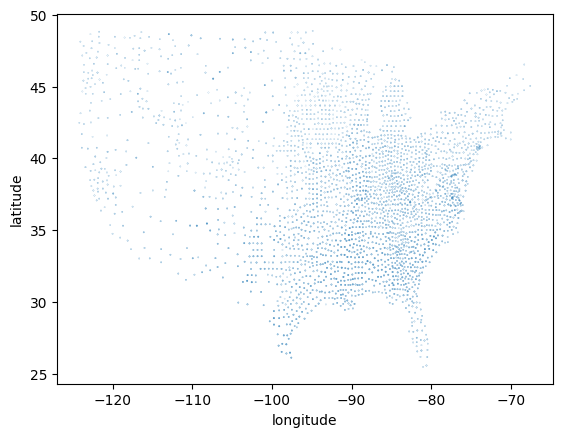

In [10]:
lower_48_frame.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = 'Auto/retail loan delinquency rate, All')

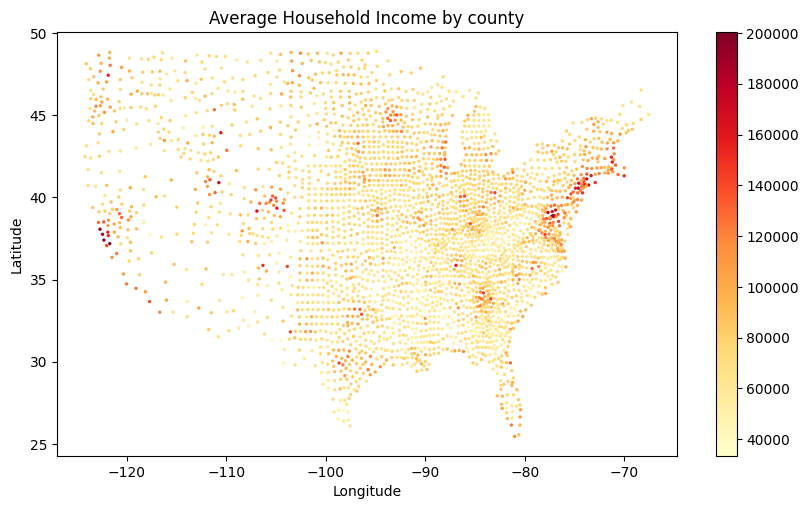

In [16]:
#### gonna try to use plt here

x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Average household income, All']
size = lower_48_frame['Average household income, All'] / 50000

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'YlOrRd')
plt.title('Average Household Income by county')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.rcParams["figure.figsize"] = (10,5.5)
#plt.legend(loc = "lower left")
plt.colorbar()

plt.show()


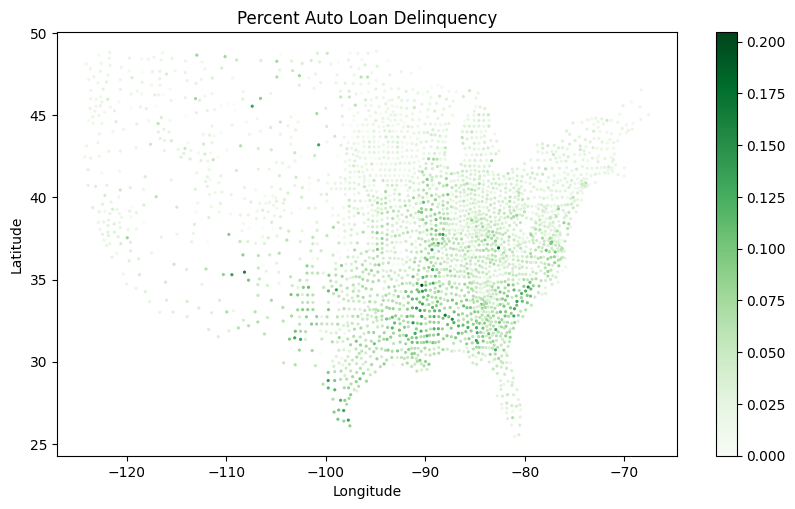

In [17]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Auto/retail loan delinquency rate, All']

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'Greens', marker='h')
plt.title('Percent Auto Loan Delinquency')
plt.rcParams["figure.figsize"] = (10,5.5)
#plt.legend(loc = "lower left")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()


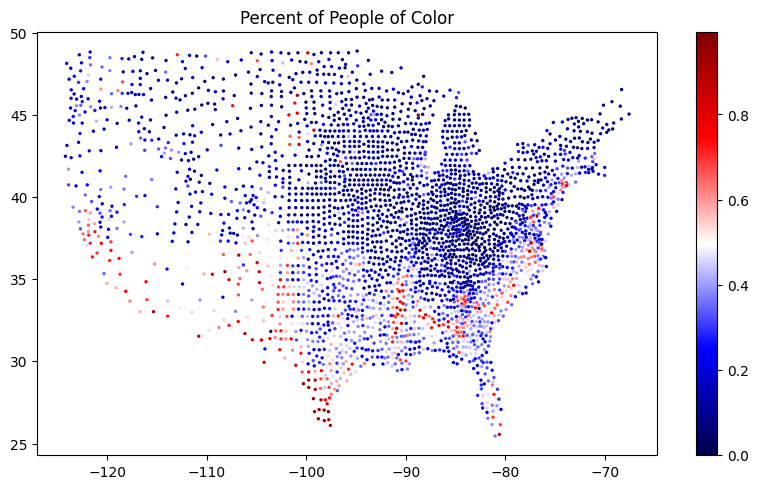

In [13]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Share of people of color']




plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic')
plt.title('Percent of People of Color')
plt.rcParams["figure.figsize"] = (10,5.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend(loc = "lower left")

plt.show()

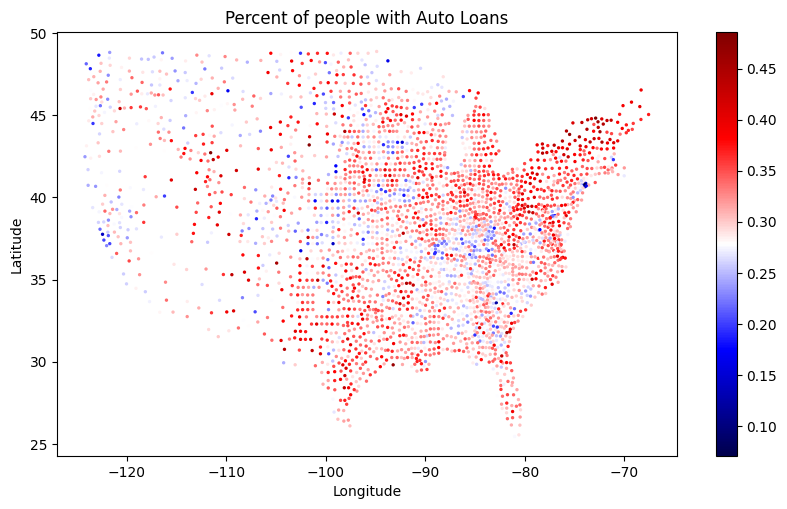

In [20]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Share with auto loans, All']

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic')
plt.title('Percent of people with Auto Loans')
plt.rcParams["figure.figsize"] = (10,5.5)
#plt.legend(loc = "lower left")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

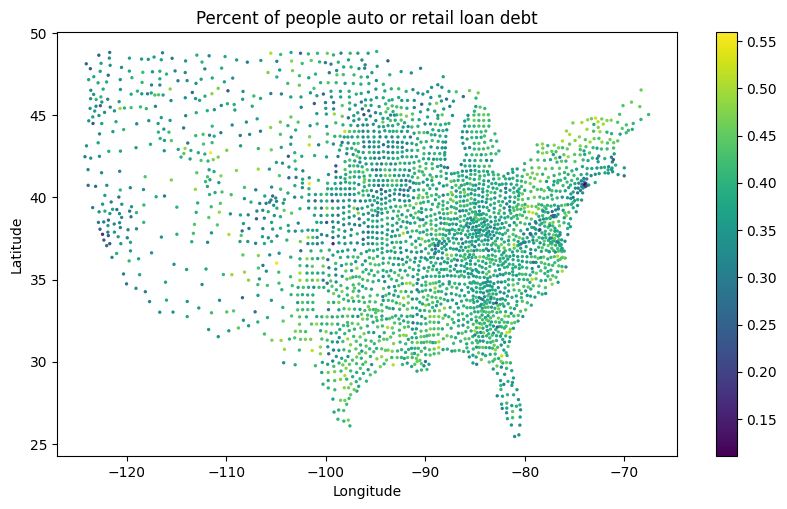

In [18]:
x_axis = lower_48_frame['longitude']
y_axis = lower_48_frame['latitude']
color = lower_48_frame['Share with auto/retail loan debt, All']

plt.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'viridis')
plt.title('Percent of people auto or retail loan debt')
plt.rcParams["figure.figsize"] = (10,5.5)
#plt.legend(loc = "lower left")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

In [107]:
half_mask = auto_data_frame['Share with auto/retail loan debt, All'] > .5

auto_data_frame[half_mask].value_counts()

County FIPS  County Name                State Name  Auto/retail loan delinquency rate, All  Auto/retail loan delinquency rate, Comm of color  Auto/retail loan delinquency rate, White comm  Auto/retail loan delinquency rate by credit score - Subprime, All  Auto/retail loan delinquency rate by credit score - Near prime, All  Auto/retail loan delinquency rate by credit score - Prime, All  Share with auto loans, All  Share with auto loans, Comm of color  Share with auto loans, White comm  Share with auto/retail loan debt, All  Share with auto/retail loan debt, Comm of color  Share with auto/retail loan debt, White comm  Share of people in rural areas, White comm  Share of people of color  Average household income, All  Average household income, Comm of color  Average household income, White comm
22031        De Soto Parish, Louisiana  Louisiana   0.081319                                0.097222                                          0.06087                                        0.286885